In [87]:
from matplotlib import pyplot as plt
import numpy as np

In [88]:
def f_linear(cx, cy, r, canvas_size=(-5,5), res=500):
    """
    cx -> coeficiente de x;
    cy -> coeficiente de y;
    r -> resultado da expressão;

    retorna:
    Tuple(x,y); onde x = eixo x, y = eixo y
    """
    if cy == 0:
        cy += 1*(10**-4)
    x_points = np.linspace(canvas_size[0], canvas_size[1], res)
    return x_points, ((x_points*cx*-1) + r)/cy

def plot_funcs(*func, canvas_size=(-5,5)):

    subscripts = ["\U00002081", "\U00002082", "\U00002083", "\U00002084"]  
    fig, ax = plt.subplots(figsize=(10,10))

    ax.grid(True)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")

    hist = []
    fl = []
    for function in enumerate(func):
        pos, f = function
        fx, fy = f
        if function[0] < 4:
            plt.plot(*f, label = f"f(x{subscripts[pos]})") #grafico de linha
        else:
            plt.plot(*f)

        for f2 in enumerate(func):
            fx2, fy2 = f2[1]
            idx = np.argwhere(np.diff(np.sign(fy - fy2))).flatten()
            if any(idx) and idx not in hist:  
                    hist.append(idx)
                    fl.append((fx2, fy2))

    for data in enumerate(hist):
        idx = int(data[1])
        fx, fy = fl[data[0]]
        plt.plot(fx[idx], fy[idx], 'ro', label="intersec")
                
    plt.title("visualização do sistema")
    plt.xlim(canvas_size)
    plt.ylim(canvas_size)
    
    i = abs(canvas_size[0])
    j = abs(canvas_size[1])
    maior = max(i,j)
    if maior >= 10:
        plt.xticks(np.arange(canvas_size[0], canvas_size[1]+1, (maior-maior%10)/10))
        plt.yticks(np.arange(canvas_size[0], canvas_size[1]+1, (maior-maior%10)/10))
    else:
        plt.xticks(np.arange(canvas_size[0], canvas_size[1]+1, 1))
        plt.yticks(np.arange(canvas_size[0], canvas_size[1]+1, 1))

    plt.legend(loc="upper left")
    

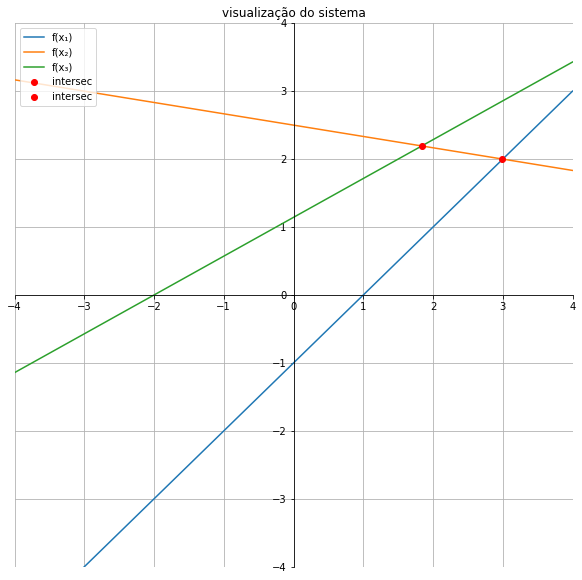

In [89]:
canvas = (-4,4)

f1 = f_linear(1, -1, 1, canvas)
f2 = f_linear(1, 6, 15, canvas) 
f3 = f_linear(-4, 7, 8, canvas)
f4 = f_linear(9, 18, -54, canvas)

plot_funcs(f1, f2, f3, canvas_size=canvas)